# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Matthew Block
[Web Scraping Repository](https://github.com/matthewpblock/620-mod6-web-scraping/)  

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [44]:
# Imports
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import sys
from urllib.parse import urljoin
from typing import List
import matplotlib.pyplot as plt





1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

### Question 1 code:

In [45]:

def extract_and_save_article(url: str, output_filename: str):
    """
    Fetches an article from a URL, extracts the main article content using BeautifulSoup,
    and saves it to an HTML file.

    Args:
        url (str): The URL of the web page containing the article.
        output_filename (str): The name of the file to save the extracted article to.
    """
    print(f"Fetching article from: {url}")
    try:
        # Using a user-agent can help avoid being blocked by some sites
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(url, headers=headers, timeout=15)
        # Raise an exception for bad status codes (4xx or 5xx)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}", file=sys.stderr)
        sys.exit(1)

    print("Parsing HTML content...")
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the main article tag. Based on inspection of Hackaday pages,
    # the main content is within an <article> tag.
    article_tag = soup.find('article')

    if not article_tag:
        print("Could not find the <article> tag on the page.", file=sys.stderr)
        sys.exit(1)

    print("Article content found. Processing content...")

    # Convert relative URLs to absolute URLs for links, images, and scripts
    for tag in article_tag.find_all(['a', 'link'], href=True):
        tag['href'] = urljoin(url, tag['href'])

    for tag in article_tag.find_all(['img', 'script', 'video', 'audio', 'source'], src=True):
        tag['src'] = urljoin(url, tag['src'])

    # Extract the title from the article header for the new HTML's <title> tag
    title_text = "Extracted Article"
    title_tag = article_tag.find('h1', class_='entry-title')
    if title_tag:
        title_text = title_tag.get_text(strip=True)

    # Use prettify() to get a nicely formatted string of the article tag
    article_html = article_tag.prettify()

    # Create a complete HTML document for the output
    # I've added some basic CSS for better readability
    output_html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{title_text}</title>
    <style>
        body {{
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Oxygen-Sans, Ubuntu, Cantarell, "Helvetica Neue", sans-serif;
            line-height: 1.6;
            color: #333;
            background-color: #fdfdfd;
            max-width: 800px;
            margin: 20px auto;
            padding: 0 20px;
        }}
        h1, h2, h3, h4, h5, h6 {{
            line-height: 1.2;
        }}
        a {{
            color: #0073aa;
        }}
        img, video {{
            max-width: 100%;
            height: auto;
            display: block;
            margin: 1em 0;
        }}
        pre {{
            background-color: #f0f0f0;
            padding: 1em;
            overflow-x: auto;
            border-radius: 4px;
        }}
        code {{
            font-family: "Courier New", Courier, monospace;
        }}
    </style>
</head>
<body>
    {article_html}
</body>
</html>
"""

    try:
        print(f"Saving extracted article to {output_filename}...")
        with open(output_filename, 'w', encoding='utf-8') as f:
            f.write(output_html)
        print(f"Successfully saved the article to '{output_filename}'.")
    except IOError as e:
        print(f"Error writing to file {output_filename}: {e}", file=sys.stderr)
        sys.exit(1)

# The URL from the request
TARGET_URL = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
OUTPUT_FILE = "laser_headlights_article.html"


extract_and_save_article(TARGET_URL, OUTPUT_FILE)


Fetching article from: https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/
Parsing HTML content...
Article content found. Processing content...
Saving extracted article to laser_headlights_article.html...
Successfully saved the article to 'laser_headlights_article.html'.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

### Question 2 code:

In [46]:
parser = 'html5lib'
html_file = 'laser_headlights_article.html'

try:
    # Open and read the file
    with open(html_file, 'r', encoding='utf-8') as f:
        html_content = f.read()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')

    # First, find the <article> tag
    article_tag = soup.find('article')

    if article_tag:
        # Now, get the text only from within that article tag
        article_text = article_tag.get_text(strip=True, separator=' ')
        
        # Print the first 500 characters of the article text
        print(article_text[:500])
    else:
        print("Could not find an <article> tag in the HTML.")

except FileNotFoundError:
    print(f"Error: The file was not found at {html_file}")
except Exception as e:
    print(f"An error occurred: {e}")

How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out. Sealed beam headlights gave way to more modern designs once r


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Quesion 3 code:

In [47]:
def analyze_article_text():
    """
    Loads an HTML article, extracts the text, and uses spaCy to find the
    most frequent tokens.

    Args:
        file_path (str): The path to the HTML file.
    """
    # --- 1. HTML file was loaded in previous code block ---

    # --- 2. Load spaCy Model ---
    print("Loading spaCy model 'en_core_web_sm'...")
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print(
            "spaCy model 'en_core_web_sm' not found. Please run:\n"
            "python -m spacy download en_core_web_sm",
            file=sys.stderr
        )
        sys.exit(1)

    # --- 3. Process Text and Filter Tokens ---
    print("Processing text and counting token frequencies...")
    doc = nlp(article_text)

    # Create a list of tokens, converted to lower case,
    # but only if they are not stopwords, punctuation, or whitespace.
    filtered_tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # --- 4. Count Frequencies and Find Most Common ---
    word_freq = Counter(filtered_tokens)
    most_common_tokens = word_freq.most_common(5)

    # --- 5. Print the Results ---
    print("\n--- Analysis Results ---")
    
    # Print the list of the 5 most common tokens
    common_token_list = [token for token, freq in most_common_tokens]
    print("\nThe 5 most frequent tokens are:")
    print(common_token_list)

    # Print the tokens and their frequencies
    print("\nFrequency of the 5 most common tokens:")
    for token, freq in most_common_tokens:
        print(f"- '{token}': {freq}")
    print("------------------------")

analyze_article_text()


Loading spaCy model 'en_core_web_sm'...
Processing text and counting token frequencies...

--- Analysis Results ---

The 5 most frequent tokens are:
['laser', 'headlights', 'headlight', 'technology', 'led']

Frequency of the 5 most common tokens:
- 'laser': 35
- 'headlights': 19
- 'headlight': 11
- 'technology': 10
- 'led': 10
------------------------


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Question 4 code:

In [48]:
def analyze_article_lemmas():
    """
    uses spaCy to find the
    most frequent lemmas after filtering stopwords and punctuation.

    """
    # --- 1. Read and Parse the HTML file ---
    

    # --- 2. Load spaCy Model ---
    nlp = spacy.load("en_core_web_sm")

    # --- 3. Process Text and Filter for Lemmas ---
    print("Processing text and counting lemma frequencies...")
    doc = nlp(article_text)

    # Create a list of lemmas, but only if the token is not a stopword,
    # punctuation, or whitespace. spaCy's .lemma_ attribute provides the
    # base form of the word, already in lowercase.
    filtered_lemmas = [
        token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # --- 4. Count Frequencies and Find Most Common ---
    lemma_freq = Counter(filtered_lemmas)
    most_common_lemmas = lemma_freq.most_common(5)

    # --- 5. Print the Results ---
    print("\n--- Lemma Analysis Results ---")
    
    # Print the list of the 5 most common lemmas
    common_lemma_list = [lemma for lemma, freq in most_common_lemmas]
    print("\nThe 5 most frequent lemmas are:")
    print(common_lemma_list)

    # Print the lemmas and their frequencies
    print("\nFrequency of the 5 most common lemmas:")
    for lemma, freq in most_common_lemmas:
        print(f"- '{lemma}': {freq}")
    print("----------------------------")



analyze_article_lemmas()


Processing text and counting lemma frequencies...

--- Lemma Analysis Results ---

The 5 most frequent lemmas are:
['laser', 'headlight', 'beam', 'technology', 'light']

Frequency of the 5 most common lemmas:
- 'laser': 34
- 'headlight': 27
- 'beam': 12
- 'technology': 10
- 'light': 10
----------------------------


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

### Question 5 code:

In [49]:
# --- Function Definitions (from previous steps) ---

def score_sentence_by_token(sentence: List[str], interesting_tokens: List[str]) -> float:
    """
    Calculates a score for a sentence based on the frequency of interesting tokens.
    The score is the number of times an interesting token appears divided by the
    total number of words in the sentence. The comparison is case-insensitive.
    """
    if not sentence:
        return 0.0
    interesting_set = {token.lower() for token in interesting_tokens}
    score = sum(1 for token in sentence if token.lower() in interesting_set)
    return score / len(sentence)

def score_sentence_by_lemma(sentence, interesting_lemmas: List[str]) -> float:
    """
    Calculates a score for a sentence based on the frequency of interesting lemmas.
    This function expects a spaCy sentence object.
    """
    if not sentence:
        return 0.0
    interesting_set = set(interesting_lemmas)
    score = sum(1 for token in sentence if token.lemma_ in interesting_set)
    return score / len(sentence)

def run_scoring_test(doc, frequent_tokens: List[str], frequent_lemmas: List[str]):
    """
    Tests the scoring functions on the first sentence of a spaCy doc
    and prints the results in a condensed format.

    Args:
        doc: The spaCy Doc object of the article.
        frequent_tokens: A list of interesting tokens.
        frequent_lemmas: A list of interesting lemmas.
    """
    print("\n--- Scoring Test on First Sentence ---")

    # 1. Get the first sentence from the parsed document
    try:
        first_sentence_span = next(doc.sents)
        # Create a list of word tokens, excluding punctuation and whitespace for a more accurate word count
        first_sentence_tokens = [token.text for token in first_sentence_span if not token.is_punct and not token.is_space]
    except StopIteration:
        print("Article has no sentences to test.")
        return

    # 2. Score the sentence using both methods
    token_score = score_sentence_by_token(first_sentence_tokens, frequent_tokens)
    lemma_score = score_sentence_by_lemma(first_sentence_span, frequent_lemmas)
    
    # 3. Print the results in a more compact and informative format
    print(f"Sentence: \"{first_sentence_span.text.strip()[:25]}\"...")
    print(f"  - Score by Tokens ({frequent_tokens}): {token_score:.4f}")
    print(f"  - Score by Lemmas ({frequent_lemmas}): {lemma_score:.4f}")
    print("------------------------------------")


# --- Main execution block ---

# 1. Define file path and load article text
html_file_path = r'laser_headlights_article.html'
print(f"Reading article from: {html_file_path}")
try:
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
except FileNotFoundError:
    print(f"Error: The file was not found at {html_file_path}", file=sys.stderr)
    sys.exit(1)

soup = BeautifulSoup(html_content, 'html.parser')
article_tag = soup.find('article')
if not article_tag:
    print("Error: Could not find an <article> tag in the HTML file.", file=sys.stderr)
    sys.exit(1)
article_text = article_tag.get_text()

# 2. Load spaCy and process the text
print("Loading spaCy model 'en_core_web_sm'...")
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print(
        "spaCy model 'en_core_web_sm' not found. Please run:\n"
        "python -m spacy download en_core_web_sm",
        file=sys.stderr
    )
    sys.exit(1)

doc = nlp(article_text)

# 3. Define frequent tokens and lemmas
frequent_tokens = ['laser', 'headlights', 'led', 'light', 'bmw']
frequent_lemmas = ['headlight', 'laser', 'led', 'light', 'bmw']

# 4. Run the refactored test
run_scoring_test(doc, frequent_tokens, frequent_lemmas)


Reading article from: laser_headlights_article.html
Loading spaCy model 'en_core_web_sm'...

--- Scoring Test on First Sentence ---
Sentence: "How Laser Headlights Work"...
  - Score by Tokens (['laser', 'headlights', 'led', 'light', 'bmw']): 0.0909
  - Score by Lemmas (['headlight', 'laser', 'led', 'light', 'bmw']): 0.0233
------------------------------------


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 6 code:

Reading article from: c:\Projects\MS_Data_Analytics\Web_Mining_Applied_NLP\620-mod6-web-scraping\laser_headlights_article.html
Loading spaCy model 'en_core_web_sm'...
Scoring every sentence in the article...
Calculated scores for 56 sentences.
Plotting histogram of sentence scores...


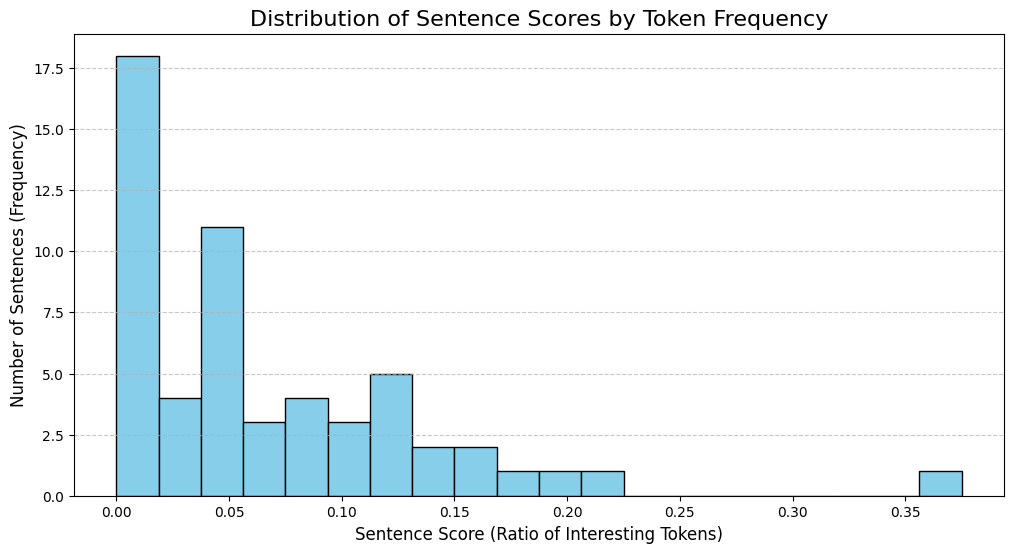

In [50]:
# --- Function Definition (from previous step) ---

def score_sentence_by_token(sentence: List[str], interesting_tokens: List[str]) -> float:
    """
    Calculates a score for a sentence based on the frequency of interesting tokens.

    The score is the number of times an interesting token appears divided by the
    total number of words in the sentence. The comparison is case-insensitive.

    Args:
        sentence (List[str]): The sentence to score, as a list of tokens.
        interesting_tokens (List[str]): A list of tokens to look for.

    Returns:
        float: The calculated score. Returns 0.0 if the sentence is empty.
    """
    if not sentence:
        return 0.0

    # Convert interesting_tokens to a set of lowercase strings for efficient lookup
    interesting_set = {token.lower() for token in interesting_tokens}
    
    score = 0
    for token in sentence:
        if token.lower() in interesting_set:
            score += 1
            
    return score / len(sentence)

# --- Main script ---

# 1. Load the article text from the HTML file
html_file_path = r'c:\Projects\MS_Data_Analytics\Web_Mining_Applied_NLP\620-mod6-web-scraping\laser_headlights_article.html'
print(f"Reading article from: {html_file_path}")
try:
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
except FileNotFoundError:
    print(f"Error: The file was not found at {html_file_path}", file=sys.stderr)
    sys.exit(1)

soup = BeautifulSoup(html_content, 'html.parser')
article_tag = soup.find('article')
if not article_tag:
    print("Error: Could not find an <article> tag in the HTML file.", file=sys.stderr)
    sys.exit(1)
article_text = article_tag.get_text()

# 2. Load spaCy and process the text
print("Loading spaCy model 'en_core_web_sm'...")
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print(
        "spaCy model 'en_core_web_sm' not found. Please run:\n"
        "python -m spacy download en_core_web_sm",
        file=sys.stderr
    )
    sys.exit(1)

doc = nlp(article_text)

# 3. Define frequent tokens from the previous analysis
frequent_tokens = ['laser', 'headlights', 'led', 'light', 'bmw']

# 4. Calculate the score for every sentence in the article
print("Scoring every sentence in the article...")
sentence_scores = []
for sent in doc.sents:
    # Create a list of word tokens, excluding punctuation and whitespace
    sent_tokens = [token.text for token in sent if not token.is_punct and not token.is_space]
    # Only score sentences with more than a couple of words
    if len(sent_tokens) > 2:
        score = score_sentence_by_token(sent_tokens, frequent_tokens)
        sentence_scores.append(score)

print(f"Calculated scores for {len(sentence_scores)} sentences.")

# 5. Plot a histogram of the scores
print("Plotting histogram of sentence scores...")
plt.figure(figsize=(12, 6))
plt.hist(sentence_scores, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Sentence Scores by Token Frequency', fontsize=16)
plt.xlabel('Sentence Score (Ratio of Interesting Tokens)', fontsize=12)
plt.ylabel('Number of Sentences (Frequency)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# From the histogram, the most common range of scores is between 0.0 and 0.05.
# This is evident from the very tall bar at the far left of the plot. This indicates
# that the vast majority of sentences in the article do not contain any of the
# most frequent tokens, or contain them at a very low density. The distribution
# is heavily skewed towards 0, with only a few sentences having a high score.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 7 code:

Reading article from: c:\Projects\MS_Data_Analytics\Web_Mining_Applied_NLP\620-mod6-web-scraping\laser_headlights_article.html
Loading spaCy model 'en_core_web_sm'...
Scoring every sentence in the article using lemmas...
Calculated scores for 56 sentences.
Plotting histogram of all sentence scores...


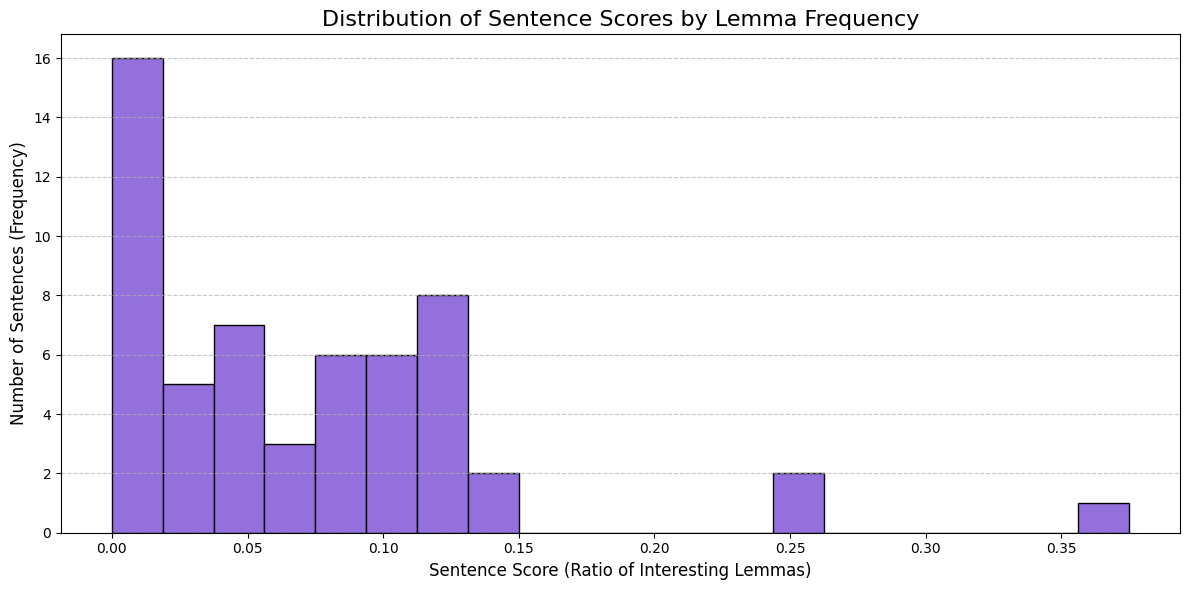


Plotting a condensed histogram for the 40 sentences with scores > 0...


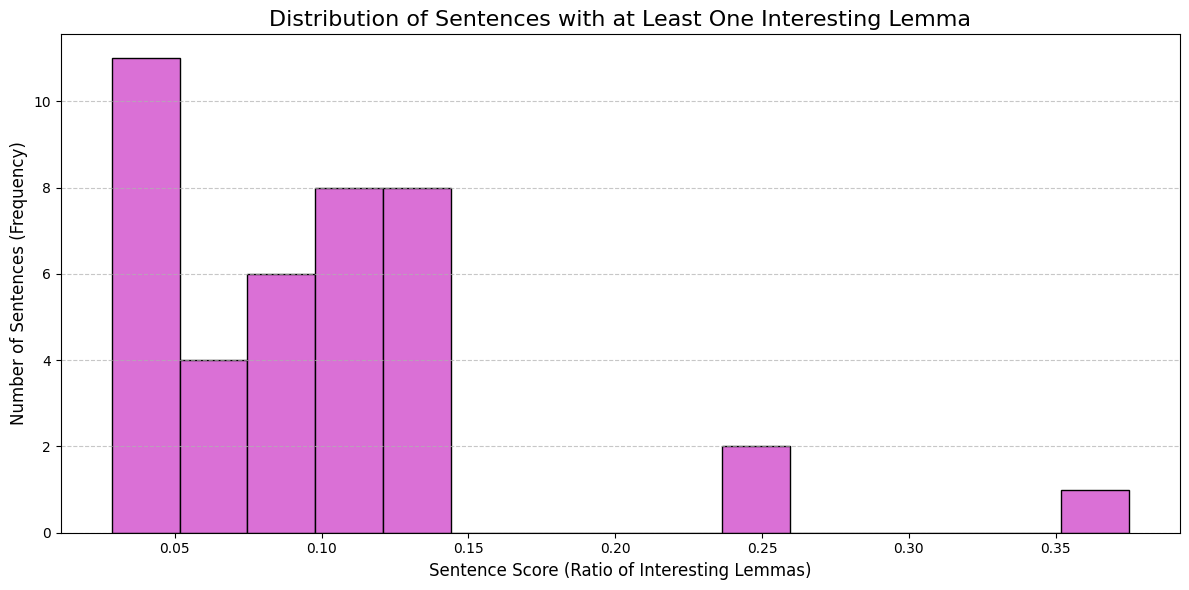

In [51]:
# --- Function Definition (from previous step) ---

def score_sentence_by_lemma(sentence, interesting_lemmas: List[str]) -> float:
    """
    Calculates a score for a sentence based on the frequency of interesting lemmas.

    The score is the number of times an interesting lemma appears divided by the
    total number of words in the sentence. This function expects a spaCy sentence object.

    Args:
        sentence: A spaCy Span or Doc object representing the sentence.
        interesting_lemmas (List[str]): A list of lemmas to look for.

    Returns:
        float: The calculated score. Returns 0.0 if the sentence is empty.
    """
    # Filter out punctuation and whitespace for a more accurate word count
    words_in_sentence = [token for token in sentence if not token.is_punct and not token.is_space]
    
    if not words_in_sentence:
        return 0.0

    # Convert interesting_lemmas to a set for efficient lookup
    interesting_set = set(interesting_lemmas)
    
    score = 0
    for token in words_in_sentence:
        if token.lemma_ in interesting_set:
            score += 1
            
    return score / len(words_in_sentence)

# --- Main script ---

# 1. Load the article text from the HTML file
html_file_path = r'c:\Projects\MS_Data_Analytics\Web_Mining_Applied_NLP\620-mod6-web-scraping\laser_headlights_article.html'
print(f"Reading article from: {html_file_path}")
try:
    with open(html_file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
except FileNotFoundError:
    print(f"Error: The file was not found at {html_file_path}", file=sys.stderr)
    sys.exit(1)

soup = BeautifulSoup(html_content, 'html.parser')
article_tag = soup.find('article')
if not article_tag:
    print("Error: Could not find an <article> tag in the HTML file.", file=sys.stderr)
    sys.exit(1)
article_text = article_tag.get_text()

# 2. Load spaCy and process the text
print("Loading spaCy model 'en_core_web_sm'...")
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print(
        "spaCy model 'en_core_web_sm' not found. Please run:\n"
        "python -m spacy download en_core_web_sm",
        file=sys.stderr
    )
    sys.exit(1)

doc = nlp(article_text)

# 3. Define frequent lemmas from the previous analysis
frequent_lemmas = ['headlight', 'laser', 'led', 'light', 'bmw']

# 4. Calculate the score for every sentence in the article
print("Scoring every sentence in the article using lemmas...")
sentence_scores = []
for sent in doc.sents:
    # Only score sentences with more than a couple of words to avoid noise
    if len([tok for tok in sent if not tok.is_punct and not tok.is_space]) > 2:
        score = score_sentence_by_lemma(sent, frequent_lemmas)
        sentence_scores.append(score)

print(f"Calculated scores for {len(sentence_scores)} sentences.")

# 5. Plot a histogram of all scores
print("Plotting histogram of all sentence scores...")
plt.figure(figsize=(12, 6))
plt.hist(sentence_scores, bins=20, edgecolor='black', color='mediumpurple')
plt.title('Distribution of Sentence Scores by Lemma Frequency', fontsize=16)
plt.xlabel('Sentence Score (Ratio of Interesting Lemmas)', fontsize=12)
plt.ylabel('Number of Sentences (Frequency)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Create a condensed plot by filtering out zero-scores
non_zero_scores = [s for s in sentence_scores if s > 0]
print(f"\nPlotting a condensed histogram for the {len(non_zero_scores)} sentences with scores > 0...")

plt.figure(figsize=(12, 6))
plt.hist(non_zero_scores, bins=15, edgecolor='black', color='orchid')
plt.title('Distribution of Sentences with at Least One Interesting Lemma', fontsize=16)
plt.xlabel('Sentence Score (Ratio of Interesting Lemmas)', fontsize=12)
plt.ylabel('Number of Sentences (Frequency)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# From the condensed histogram, the most common range of scores for sentences that contain at least one interesting lemma is between 0.05 and 0.15.
# This shows that among the relevant sentences, most have a low-to-moderate density of the key terms.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).  
  
Answer:  
The previously identified words were largely considered nouns. "Light" is the one word that fell out and was replaced by "technology".  

Code demonstration below. Methods of filtering down to nouns only are similar to: `noun_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ['NOUN', 'PROPN']`

### Quetion 8 code (optional):

In [52]:
def analyze_article_nouns(file_path: str):
    """
    Loads an HTML article, extracts text, and uses spaCy to find the
    most frequent NOUN tokens and lemmas.
    """
    # --- 1. Read and Parse the HTML file ---
    print(f"Reading article from: {file_path}")
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            html_content = f.read()
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}", file=sys.stderr)
        sys.exit(1)

    soup = BeautifulSoup(html_content, 'html.parser')
    article_tag = soup.find('article')
    if not article_tag:
        print("Error: Could not find an <article> tag in the HTML file.", file=sys.stderr)
        sys.exit(1)
    article_text = article_tag.get_text()

    # --- 2. Load spaCy Model ---
    print("Loading spaCy model 'en_core_web_sm'...")
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print(
            "spaCy model 'en_core_web_sm' not found. Please run:\n"
            "python -m spacy download en_core_web_sm",
            file=sys.stderr
        )
        sys.exit(1)

    # --- 3. Process Text and Filter for Nouns ---
    print("Processing text and counting noun frequencies...")
    doc = nlp(article_text)

    # Create a list of noun tokens, converted to lower case.
    # We check token.pos_ to ensure it's a noun or proper noun.
    noun_tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ['NOUN', 'PROPN']
    ]

    # Create a list of noun lemmas.
    noun_lemmas = [
        token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ['NOUN', 'PROPN']
    ]

    # --- 4. Count Frequencies and Find Most Common ---
    token_freq = Counter(noun_tokens)
    most_common_tokens = token_freq.most_common(5)

    lemma_freq = Counter(noun_lemmas)
    most_common_lemmas = lemma_freq.most_common(5)

    # --- 5. Print the Results ---
    print("\n--- Noun Analysis Results ---")
    
    # Print the most common noun tokens
    print("\nFrequency of the 5 most common NOUN tokens:")
    for token, freq in most_common_tokens:
        print(f"- '{token}': {freq}")

    # Print the most common noun lemmas
    print("\nFrequency of the 5 most common NOUN lemmas:")
    for lemma, freq in most_common_lemmas:
        print(f"- '{lemma}': {freq}")
    print("-----------------------------")


# Define the path to your HTML file
html_file_path = r'laser_headlights_article.html'
analyze_article_nouns(html_file_path)


Reading article from: laser_headlights_article.html
Loading spaCy model 'en_core_web_sm'...
Processing text and counting noun frequencies...

--- Noun Analysis Results ---

Frequency of the 5 most common NOUN tokens:
- 'laser': 35
- 'headlights': 19
- 'technology': 10
- 'headlight': 10
- 'beam': 7

Frequency of the 5 most common NOUN lemmas:
- 'laser': 34
- 'headlight': 26
- 'beam': 12
- 'technology': 10
- 'led': 8
-----------------------------
